# Project

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange

In [2]:
# connect to database
port = 27017
conn = pm.MongoClient(port = port)
# coll = conn['cnn_lstm'][traindatatype + '.files']
q_train = {'exp_id' : 'trainval0'}

In [4]:
# curr_res = coll.find(q_train, projection=['validation_results'])
# for r in curr_res:
# #     print r['validation_results']['natural_scenes_testcorr']['corr']
# #     print r['validation_results']['white_noise_testcorr']['corr']
# #     print r['validation_results']['test_loss']['poisson_loss']
#     pass

In [5]:
def get_test_losses(dbname, traindatatype):
    losses = []
    coll = conn[dbname][traindatatype + '.files']
    curr_res1 = coll.find(q_train, projection=['validation_results'])
    for r in curr_res1:
        losses.append(r['validation_results']['test_loss']['poisson_loss'])
    return losses

In [6]:
def get_naturalscenes_corr(dbname, traindatatype):
    corrs = []
    coll = conn[dbname][traindatatype + '.files']
    curr_res1 = coll.find(q_train, projection=['validation_results'])
    for r in curr_res1:
        corrs.append(np.mean(r['validation_results']['natural_scenes_testcorr']['corr']))
    return corrs

In [7]:
def get_whitenoise_corr(dbname, traindatatype):
    corrs = []
    coll = conn[dbname][traindatatype + '.files']
    curr_res1 = coll.find(q_train, projection=['validation_results'])
    for r in curr_res1:
        corrs.append(np.mean(r['validation_results']['white_noise_testcorr']['corr']))
    return corrs

In [8]:
def plotCorrelations(curr_data, data_stim_type, model_stim_type, model_name, model_num):
    title = "Model " + str(model_num) + " : " + " Model trained on: " + model_stim_type + \
            "; Test data stim type: " + data_stim_type
    plt.figure()
    plt.title(title)
    plt.xlabel("Step (50x)")
    plt.ylabel("Correlation")
    plt.plot(curr_data)

In [9]:
zmww, zsww = 0.62071421146392824, 0.012690740907134443
zmwn, zswn = 0.11450486183166504, 0.010007021787799671
zmnw, zsnw = 0.31123504042625427, 0.030493100954112822
zmnn, zsnn = 0.50800756812095638, 0.013726847434299687

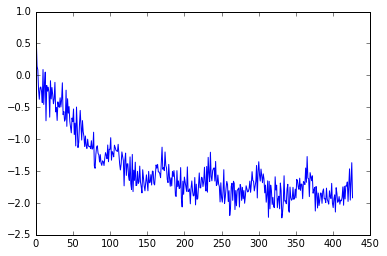

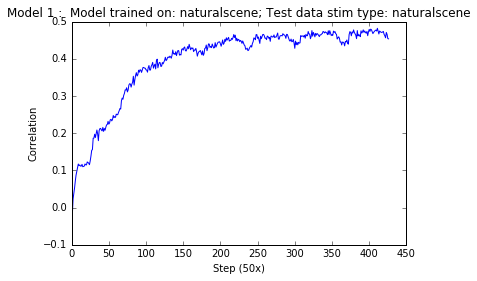

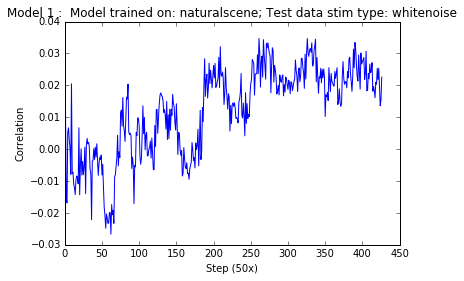

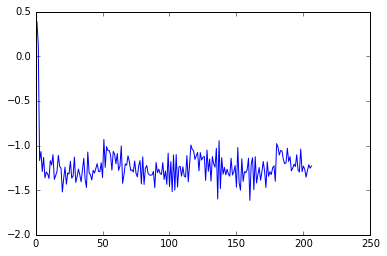

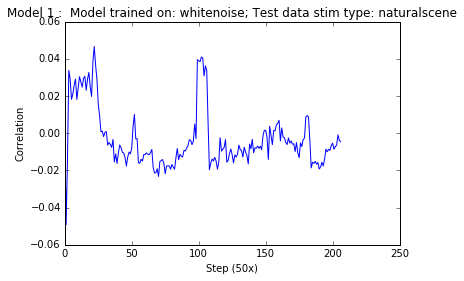

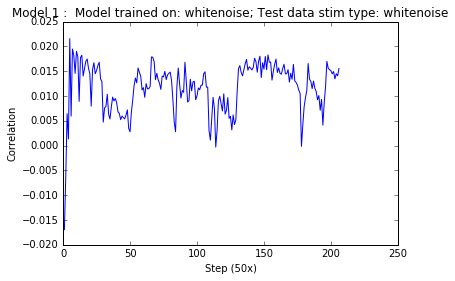

In [10]:
losses = get_test_losses('cnn_lstm_dropout', 'naturalscene')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout', 'naturalscene')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'naturalscene', 'cnn_lstm_dropout', 1)
# plt.plot(nat_scenes_corr)
omnn = np.mean(nat_scenes_corr[-50:])
osnn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout', 'naturalscene')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'naturalscene', 'cnn_lstm_dropout', 1)
# plt.plot(whitenoise_corr)
omnw = np.mean(whitenoise_corr[-50:])
osnw = np.std(whitenoise_corr[-50:])

plt.figure()
losses = get_test_losses('cnn_lstm_dropout', 'whitenoise')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout', 'whitenoise')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'whitenoise', 'cnn_lstm_dropout', 1)
# plt.plot(nat_scenes_corr)
omwn = np.mean(nat_scenes_corr[-50:])
oswn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout', 'whitenoise')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'whitenoise', 'cnn_lstm_dropout', 1)
# plt.plot(whitenoise_corr)
omww = np.mean(whitenoise_corr[-50:])
osww = np.std(whitenoise_corr[-50:])

## MODEL 2: FC LSTM Model

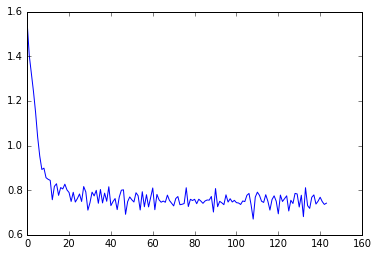

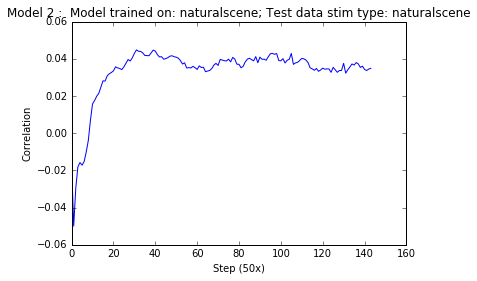

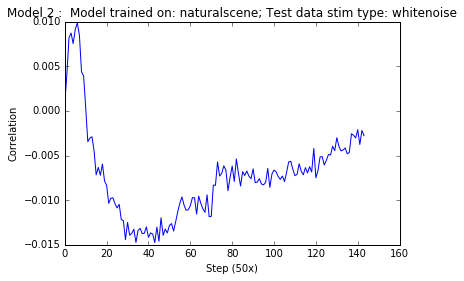

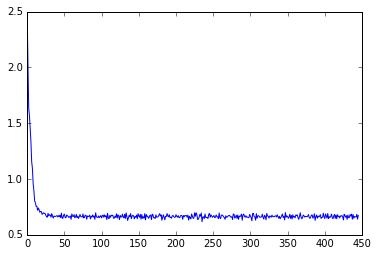

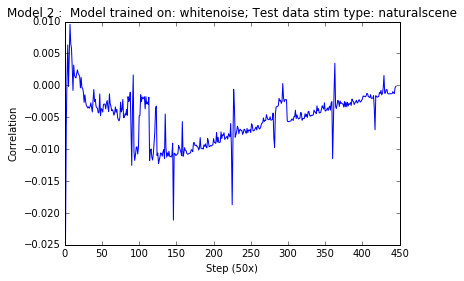

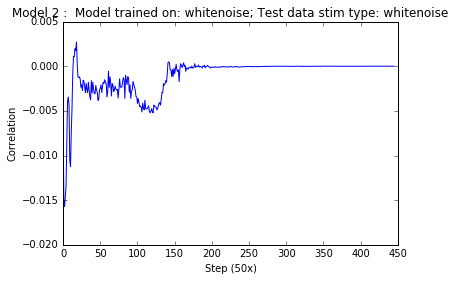

In [11]:
losses = get_test_losses('cnn_fc_lstm', 'naturalscene')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_fc_lstm', 'naturalscene')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'naturalscene', 'cnn_fc_lstm', 2)
# plt.plot(nat_scenes_corr)
tmnn = np.mean(nat_scenes_corr[-50:])
tsnn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_fc_lstm', 'naturalscene')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'naturalscene', 'cnn_fc_lstm', 2)
# plt.plot(whitenoise_corr)
tmnw = np.mean(whitenoise_corr[-50:])
tsnw = np.std(whitenoise_corr[-50:])

plt.figure()
losses = get_test_losses('cnn_fc_lstm', 'whitenoise')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_fc_lstm', 'whitenoise')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'whitenoise', 'cnn_fc_lstm', 2)
# plt.plot(nat_scenes_corr)
tmwn = np.mean(nat_scenes_corr[-50:])
tswn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_fc_lstm', 'whitenoise')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'whitenoise', 'cnn_fc_lstm', 2)
# plt.plot(whitenoise_corr)
tmww = np.mean(whitenoise_corr[-50:])
tsww = np.std(whitenoise_corr[-50:])

## MODEL 3: CNN LSTM Dropout Feedback

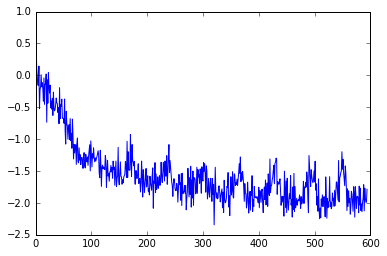

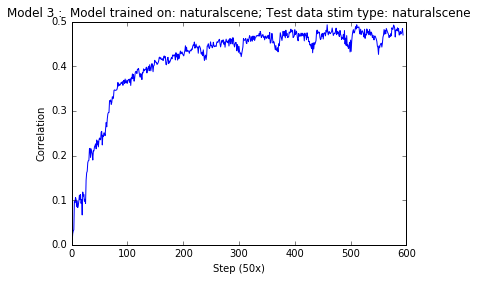

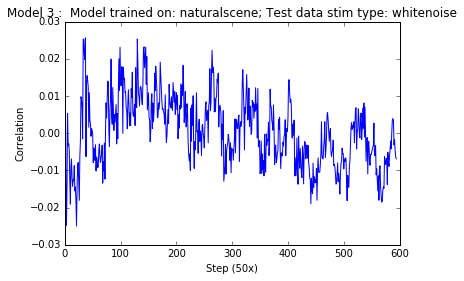

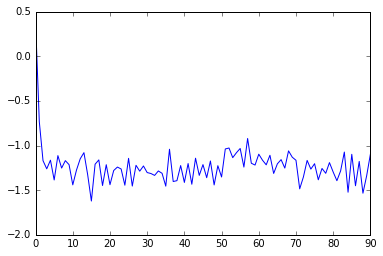

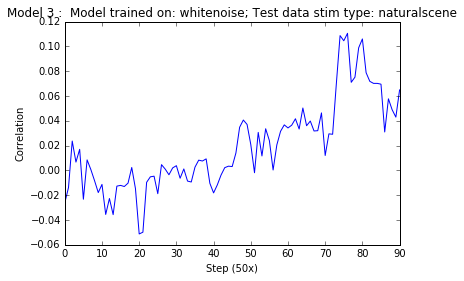

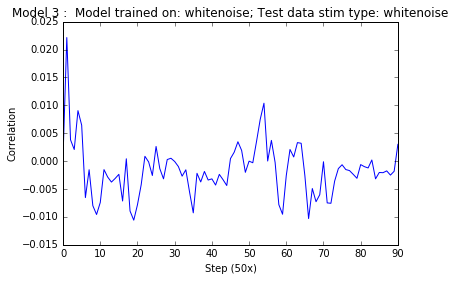

In [12]:
losses = get_test_losses('cnn_lstm_dropout_fb', 'naturalscene')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout_fb', 'naturalscene')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'naturalscene', 'cnn_lstm_dropout_fb', 3)
# plt.plot(nat_scenes_corr)
hmnn = np.mean(nat_scenes_corr[-50:])
hsnn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout_fb', 'naturalscene')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'naturalscene', 'cnn_lstm_dropout_fb', 3)
# plt.plot(whitenoise_corr)
hmnw = np.mean(whitenoise_corr[-50:])
hsnw = np.std(whitenoise_corr[-50:])

plt.figure()
losses = get_test_losses('cnn_lstm_dropout_fb', 'whitenoise')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout_fb', 'whitenoise')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'whitenoise', 'cnn_lstm_dropout_fb', 3)
# plt.plot(nat_scenes_corr)
hmwn = np.mean(nat_scenes_corr[-50:])
hswn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout_fb', 'whitenoise')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'whitenoise', 'cnn_lstm_dropout_fb', 3)
# plt.plot(whitenoise_corr)
hmww = np.mean(whitenoise_corr[-50:])
hsww = np.std(whitenoise_corr[-50:])

# Model 4

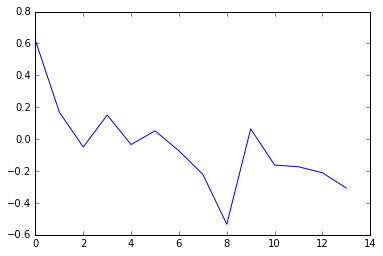

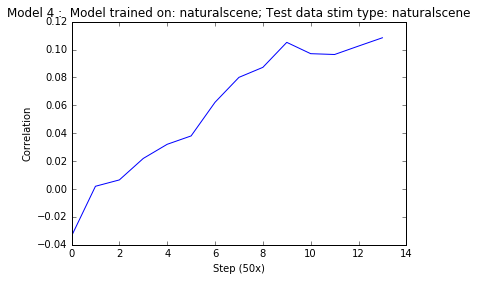

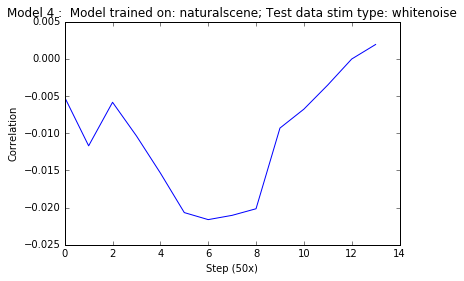

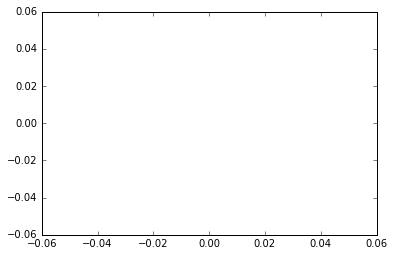

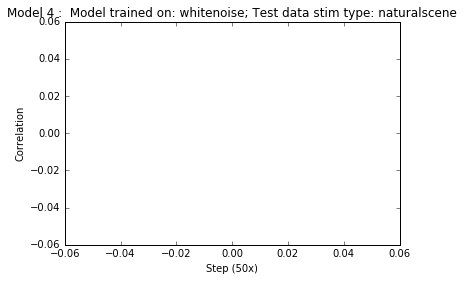

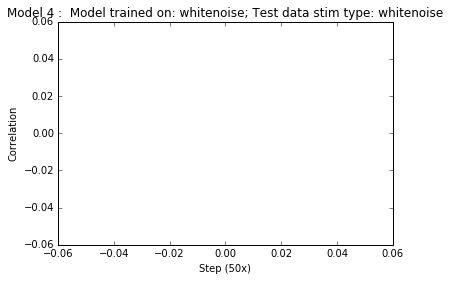

In [24]:
losses = get_test_losses('cnn_lstm_dropout_no_pre_mem', 'naturalscene')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout_no_pre_mem', 'naturalscene')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'naturalscene', 'cnn_lstm_dropout_no_pre_mem', 4)
# plt.plot(nat_scenes_corr)
fmnn = np.mean(nat_scenes_corr[-50:])
fsnn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout_no_pre_mem', 'naturalscene')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'naturalscene', 'cnn_lstm_dropout_no_pre_mem', 4)
# plt.plot(whitenoise_corr)
fmnw = np.mean(whitenoise_corr[-50:])
fsnw = np.std(whitenoise_corr[-50:])

plt.figure()
losses = get_test_losses('cnn_lstm_dropout_no_pre_mem', 'whitenoise')
# print losses
plt.plot(losses)

nat_scenes_corr = get_naturalscenes_corr('cnn_lstm_dropout_no_pre_mem', 'whitenoise')
# print nat_scenes_corr
plotCorrelations(nat_scenes_corr, 'naturalscene', 'whitenoise', 'cnn_lstm_dropout_no_pre_mem', 4)
# plt.plot(nat_scenes_corr)
fmwn = np.mean(nat_scenes_corr[-50:])
fswn = np.std(nat_scenes_corr[-50:])

whitenoise_corr = get_whitenoise_corr('cnn_lstm_dropout_no_pre_mem', 'whitenoise')
# print whitenoise_corr
plotCorrelations(whitenoise_corr, 'whitenoise', 'whitenoise', 'cnn_lstm_dropout_no_pre_mem', 4)
# plt.plot(whitenoise_corr)
fmww = np.mean(whitenoise_corr[-50:])
fsww = np.std(whitenoise_corr[-50:])

# Bar

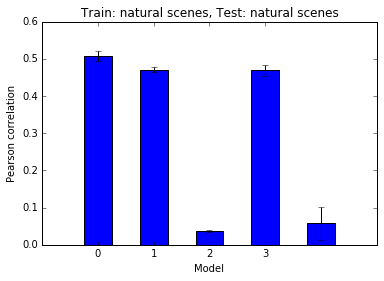

In [25]:
plt.bar([0, 1, 2, 3, 4],
        [zmnn, omnn, tmnn, hmnn, fmnn],
        width=0.5,
        align='center',
        yerr=[zsnn, osnn, tsnn, hsnn, fsnn],
        ecolor='k')
plt.xticks([0,1,2,3,4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: natural scenes, Test: natural scenes');

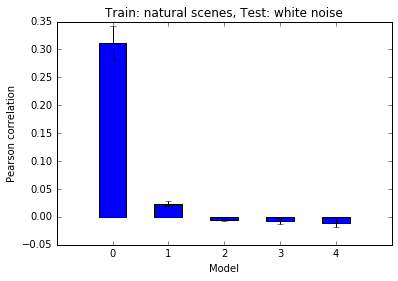

In [27]:
plt.bar([0, 1, 2, 3, 4],
        [zmnw, omnw, tmnw, hmnw, fmnw],
        width=0.5,
        align='center',
        yerr=[zsnw, osnw, tsnw, hsnw, fsnw],
        ecolor='k')
plt.xticks([0,1,2,3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: natural scenes, Test: white noise');


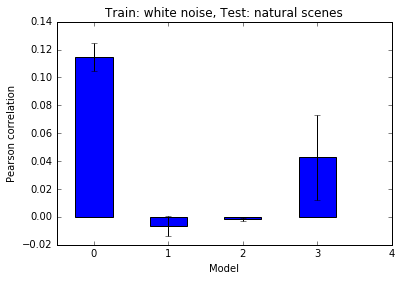

In [29]:
plt.bar([0, 1, 2, 3, 4],
        [zmwn, omwn, tmwn, hmwn, fmwn],
        width=0.5,
        align='center',
        yerr=[zswn, oswn, tswn, hswn, fswn],
        ecolor='k')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: white noise, Test: natural scenes');

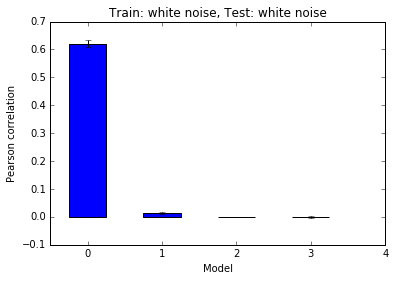

In [28]:
plt.bar([0, 1, 2, 3, 4],
        [zmww, omww, tmww, hmww, fmww],
        width=0.5,
        align='center',
        yerr=[zsww, osww, tsww, hsww, fsww],
        ecolor='k')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: white noise, Test: white noise');

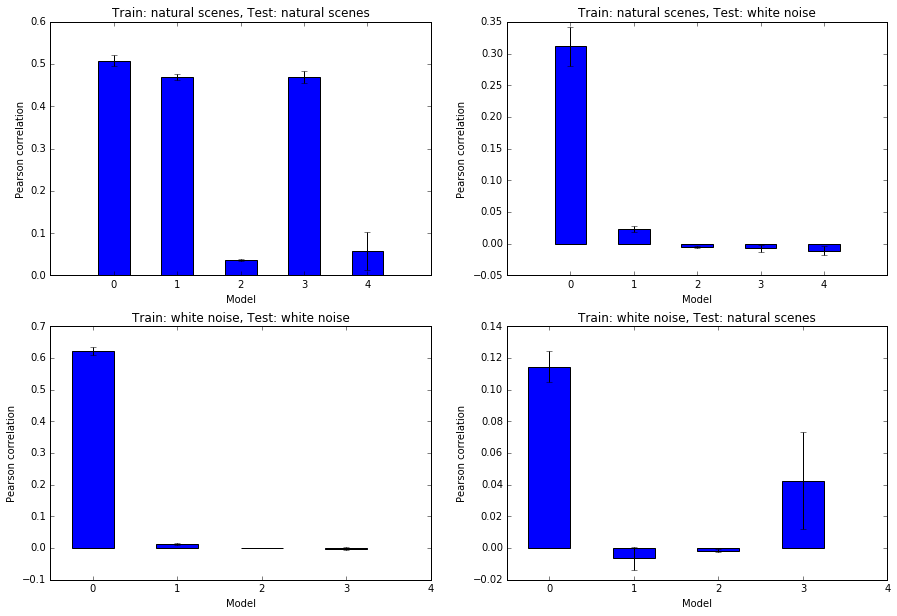

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.bar([0, 1, 2, 3, 4],
        [zmnn, omnn, tmnn, hmnn, fmnn],
        width=0.5,
        align='center',
        yerr=[zsnn, osnn, tsnn, hsnn, fsnn],
        ecolor='k')
plt.xticks([0,1,2,3,4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: natural scenes, Test: natural scenes');
plt.subplot(222)
plt.bar([0, 1, 2, 3, 4],
        [zmnw, omnw, tmnw, hmnw, fmnw],
        width=0.5,
        align='center',
        yerr=[zsnw, osnw, tsnw, hsnw, fsnw],
        ecolor='k')
plt.xticks([0,1,2,3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: natural scenes, Test: white noise');
plt.subplot(223)
plt.bar([0, 1, 2, 3, 4],
        [zmww, omww, tmww, hmww, fmww],
        width=0.5,
        align='center',
        yerr=[zsww, osww, tsww, hsww, fsww],
        ecolor='k')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: white noise, Test: white noise');
plt.subplot(224)
plt.bar([0, 1, 2, 3, 4],
        [zmwn, omwn, tmwn, hmwn, fmwn],
        width=0.5,
        align='center',
        yerr=[zswn, oswn, tswn, hswn, fswn],
        ecolor='k')
plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.ylabel('Pearson correlation');
plt.xlabel('Model');
plt.title('Train: white noise, Test: natural scenes');